In [45]:
import pandas as pd
from datetime import datetime
 
dataset=pd.read_csv("./sentiment_analysis_results_crime.csv")#lines=true perchè ogni riga del file.json è un json, devo creare tabella

dataset['Date'] = pd.to_datetime(dataset['Date'])

dataset.head(50)

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         3562 non-null   int64         
 1   Date       3562 non-null   datetime64[ns]
 2   Summary    3561 non-null   object        
 3   Sentiment  3562 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 111.4+ KB


<Figure size 1400x700 with 0 Axes>

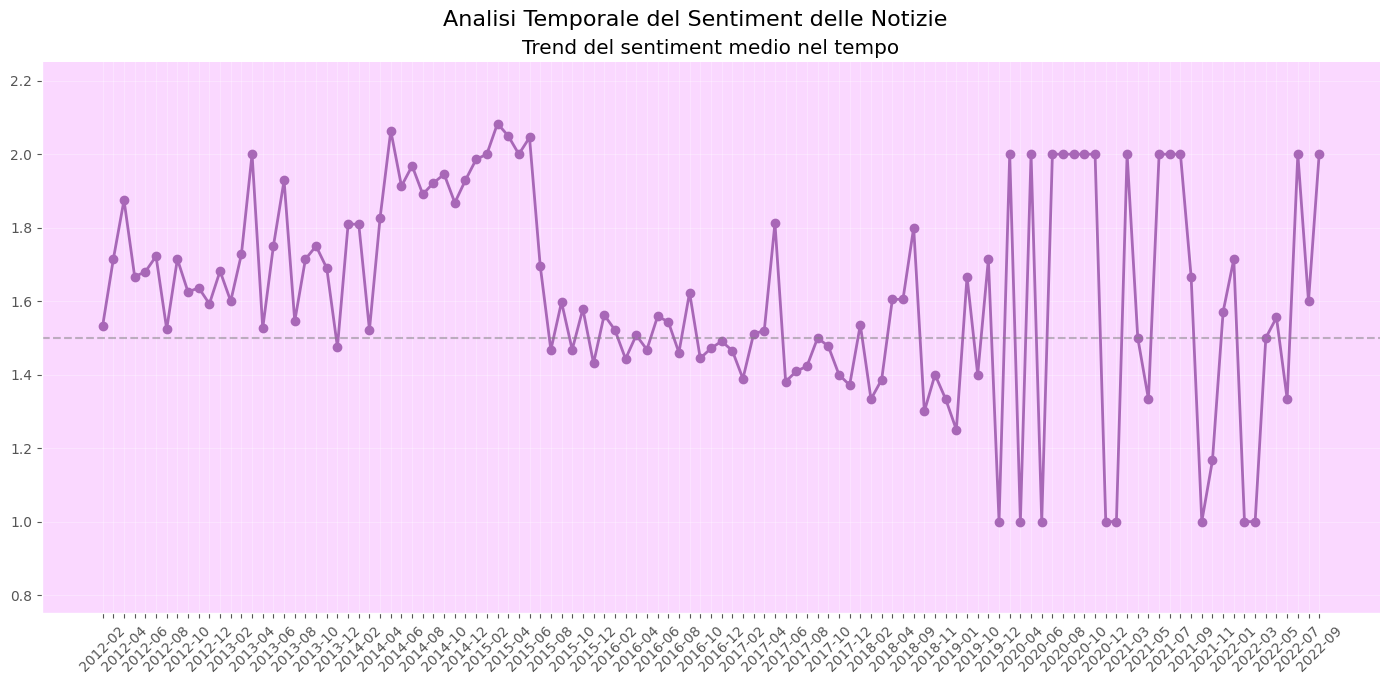

In [66]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Carica il tuo dataset
# dataset = pd.read_csv('path_to_your_dataset.csv')  # Esempio di caricamento del dataset

# Assicurati che la colonna 'Date' sia in formato datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Prepariamo i dati per l'analisi temporale
df_monthly = dataset.groupby(dataset['Date'].dt.to_period('M')).agg({
    'Sentiment': ['count', 'mean']
}).reset_index()
df_monthly.columns = ['Date', 'Count', 'Avg_Sentiment']
df_monthly['Date'] = df_monthly['Date'].astype(str)

# Grafico: Trend del Sentiment Medio nel Tempo
plt.figure(figsize=(14, 7))  # Modifica delle dimensioni
plt.style.use('ggplot')
fig = plt.figure(figsize=(14, 7))  # Modifica delle dimensioni
fig.suptitle('Analisi Temporale del Sentiment delle Notizie', fontsize=16, y=0.97)

# Trend del sentiment medio nel tempo
ax3 = plt.subplot(1, 1, 1)
ax3.plot(df_monthly['Date'], df_monthly['Avg_Sentiment'], 
         color='#A867B7', marker='o', linewidth=2)
ax3.axhline(y=1.5, color='gray', linestyle='--', alpha=0.5)
ax3.set_title('Trend del sentiment medio nel tempo')

ax3.set_facecolor("#FAD8FF")

ax3.set_xticks(df_monthly['Date']) #scrive tutte le tacchette
#seleziona solo alcune date per le etichette
step = 2 
labels = [date if i % step == 0 else '' for i, date in enumerate(df_monthly['Date'])]

ax3.set_xticklabels(labels, rotation=45)
#ax3.set_xticks(range(len(df_monthly['Date'])))  # Aggiunto per evitare UserWarning
#ax3.set_xticklabels(df_monthly['Date'], rotation=90)

ax3.set_ylim(0.75, 2.25)  # Cambiato l'intervallo Y
ax3.grid(True, alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Aggiustiamo il layout
plt.tight_layout()
plt.show()

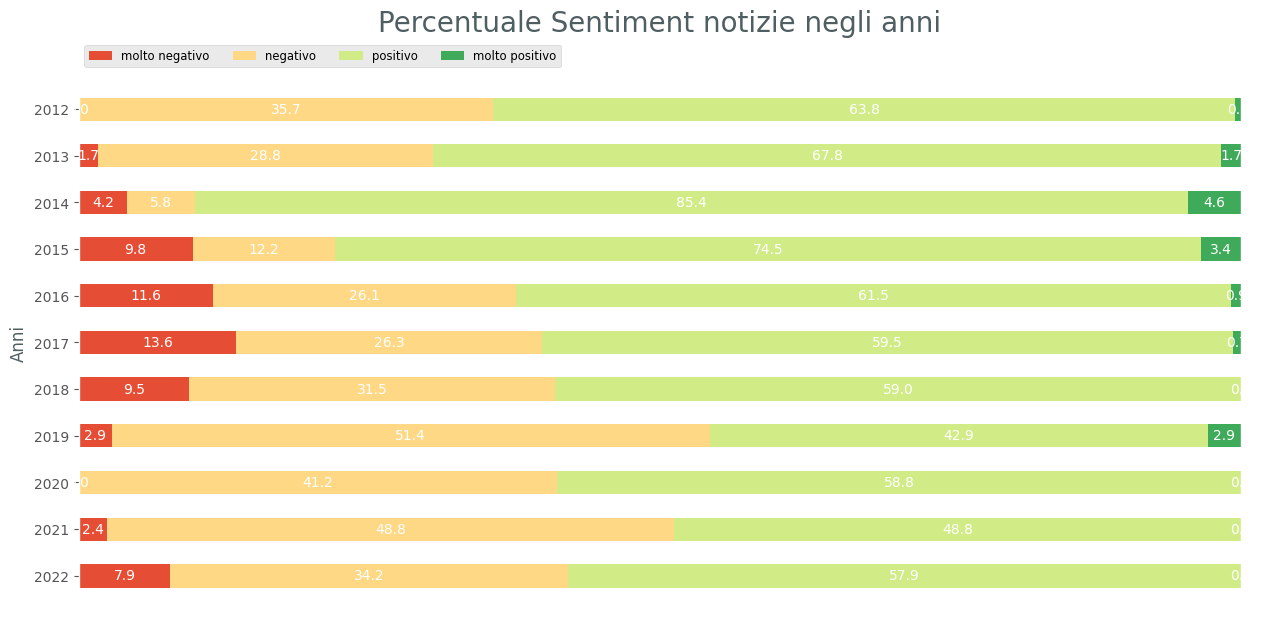

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Creiamo un dizionario che conta le occorrenze di ogni sentiment per anno
diz_anni_conteggio = defaultdict(lambda: defaultdict(int))
for i, riga in dataset.iterrows():
    year = riga["Date"].year
    sentiment = riga["Sentiment"]
    diz_anni_conteggio[year][sentiment] += 1

# Convertiamo in un formato adatto al grafico
results = {}
results_percentuale = {}

for year in sorted(diz_anni_conteggio.keys()):
    results[str(year)] = [
        diz_anni_conteggio[year].get(0, 0),
        diz_anni_conteggio[year].get(1, 0),
        diz_anni_conteggio[year].get(2, 0),
        diz_anni_conteggio[year].get(3, 0)
    ]
    # Calcolo del totale per l'anno
    total_year = sum(results[str(year)])
   
    # Calcolo delle percentuali per ogni sentiment
    if total_year > 0:
        percentuali = [
            (count / total_year * 100) for count in results[str(year)]
        ]
    else:
        percentuali = [0, 0, 0, 0]
   
    results_percentuale[str(year)] = percentuali

def survey_percentuale(results_percentuale, category_names):
    labels = list(results_percentuale.keys())
    data = np.array(list(results_percentuale.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))
   
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.set_ylabel("Anni", color="#4F5E61", fontsize=12)
    ax.set_title("Percentuale Sentiment notizie negli anni", color="#4F5E61", fontsize=20, pad=30)
   
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, 100)  # Impostiamo il limite a 100 per le percentuali
    ax.set_yticks(np.arange(len(labels)))
    ax.set_yticklabels(labels)

    ax.set_facecolor("white")
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,label=colname, color=color)
       
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        # Formattazione con una sola cifra decimale
        ax.bar_label(rects, label_type='center', color=text_color,fmt='%.1f')
   
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),loc='lower left', fontsize='small')
   
    return fig, ax

categorie_notizie = ['molto negativo', 'negativo', 'positivo', 'molto positivo']


# Plot del grafico con percentuali
survey_percentuale(results_percentuale, categorie_notizie)
plt.show()

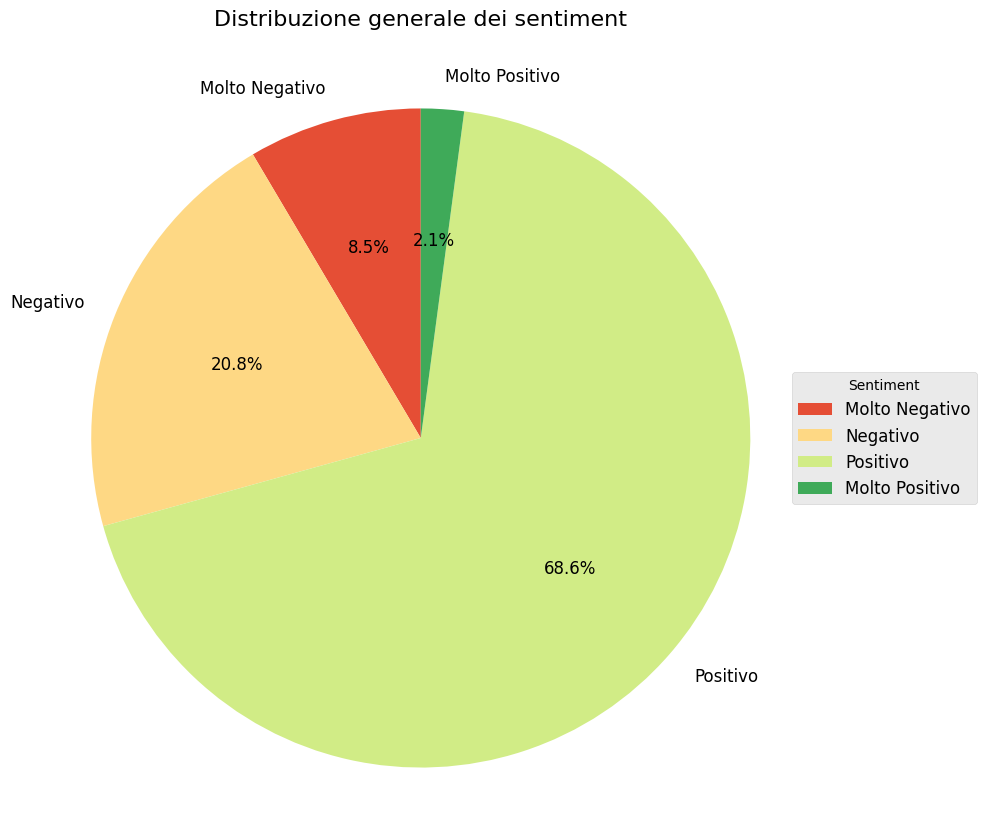

In [64]:
# Creazione del grafico a torta
figure, ax = plt.subplots(figsize=(10, 10))  # Dimensioni quadrate per un pie chart

sentiment_counts = dataset['Sentiment'].value_counts().sort_index()
labels = ["Molto Negativo", "Negativo", "Positivo", "Molto Positivo"]
colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, 4))

# Creazione della torta con percentuali
wedges, texts, autotexts = ax.pie(sentiment_counts,
                                 labels=labels,
                                 colors=colors,
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 textprops={'fontsize': 12})  # Dimensione del testo

# Titolo più grande
ax.set_title('Distribuzione generale dei sentiment', pad=20, fontsize=16)

# Legenda più grande
ax.legend(labels,
         title="Sentiment",
         loc="center left",
         bbox_to_anchor=(1, 0, 0.5, 1),
         fontsize=12)

# Assicura che il grafico sia circolare
ax.axis('equal')

# Aumenta lo spazio tra il grafico e la legenda
plt.subplots_adjust(right=0.85)

plt.show()

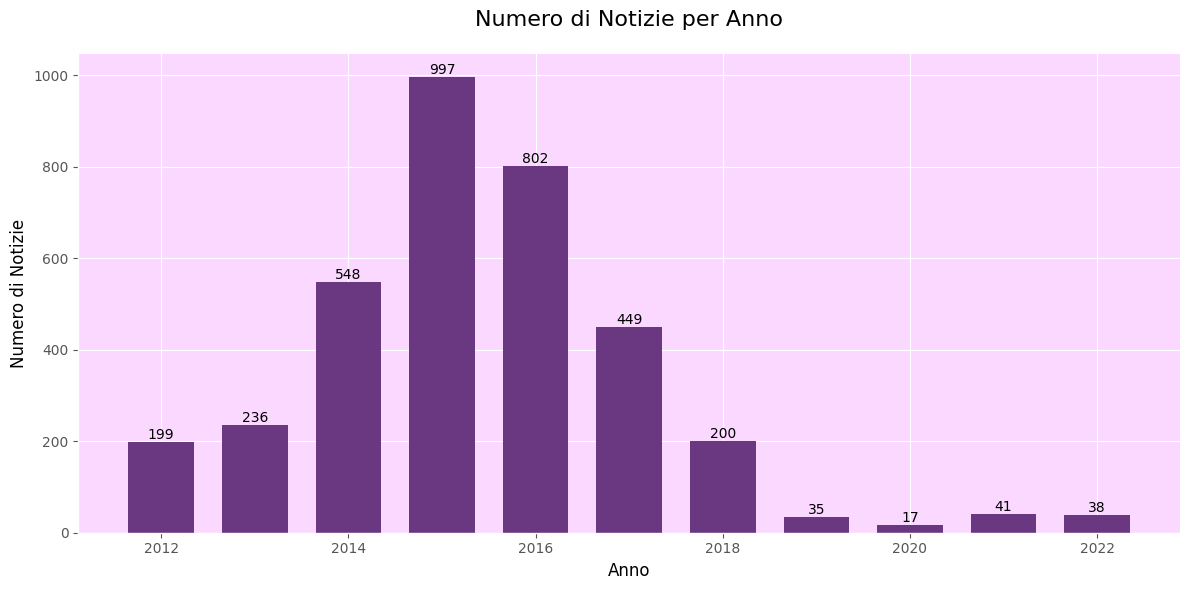

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Contiamo il numero totale di notizie per anno
conteggio_anni = defaultdict(int)
for i, riga in dataset.iterrows():
    year = riga["Date"].year
    conteggio_anni[year] += 1

# Convertiamo in liste ordinate per il plotting
anni = sorted(conteggio_anni.keys())
conteggi = [conteggio_anni[year] for year in anni]

# Creiamo la figura
plt.figure(figsize=(12, 6))

# Creiamo le barre
bars = plt.bar(anni, conteggi, color='#6A3881', width=0.7)

# Aggiungiamo le etichette sopra ogni barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height)}',
             ha='center', va='bottom')

# Personalizziamo il grafico
plt.title('Numero di Notizie per Anno', fontsize=16, color='black', pad=20)
plt.xlabel('Anno', color='black')
plt.ylabel('Numero di Notizie', color='black')

plt.gca().set_facecolor("#FAD8FF")

# Rimuoviamo i bordi
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Aggiustiamo i margini
plt.tight_layout()

plt.show()

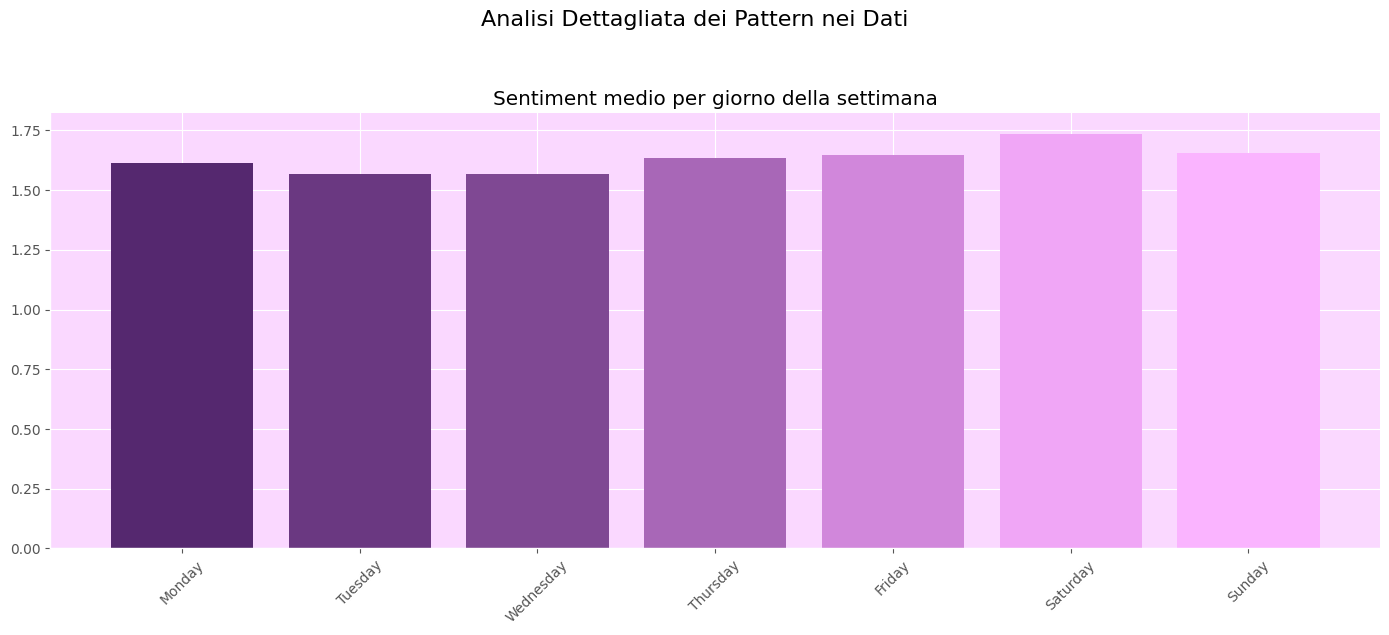

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Carica il tuo dataset
# dataset = pd.read_csv('path_to_your_dataset.csv')  # Esempio di caricamento del dataset

# Assicurati che la colonna 'Date' sia in formato datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Grafico: Sentiment Medio per Giorno della Settimana
fig2, ax1 = plt.subplots(figsize=(14, 6))  # Modifica delle dimensioni
fig2.suptitle('Analisi Dettagliata dei Pattern nei Dati', fontsize=16, y=1.05)

# Distribuzione del sentiment per giorno della settimana
weekday_sentiment = dataset.groupby(dataset['Date'].dt.day_name())['Sentiment'].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sentiment = weekday_sentiment.reindex(weekday_order)

# Nuova palette di colori (gradazioni di blu)
colors = ['#55286F', '#6A3881', '#7F4893', '#A867B7', '#D187DB', '#F0A6F6', '#FAB4FF']  
ax1.bar(weekday_sentiment.index, weekday_sentiment.values, color=colors)
ax1.set_title('Sentiment medio per giorno della settimana')
ax1.set_xticks(range(len(weekday_sentiment.index)))  # Aggiunto per evitare UserWarning
ax1.set_xticklabels(weekday_sentiment.index, rotation=45)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_facecolor("#FAD8FF")

# Aggiustiamo il layout
plt.tight_layout()
plt.show()